### Regression using numpy (with pandas and pyplot)

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


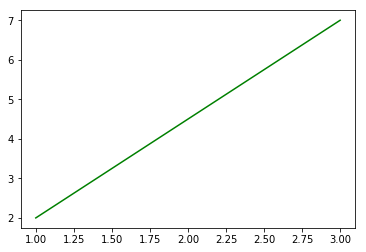

In [3]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

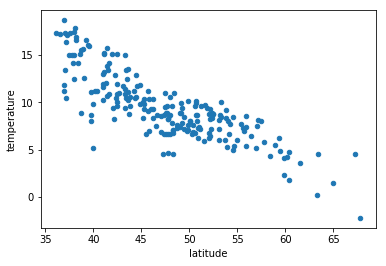

In [4]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

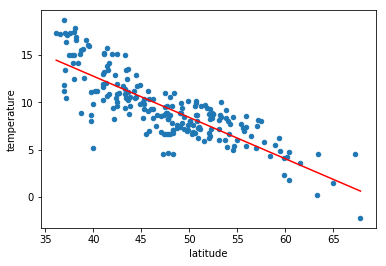

In [5]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Beautify using plt.xlim(x1,x2)

In [7]:
# Correlation coefficients (r values)
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', cc)
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', cc)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


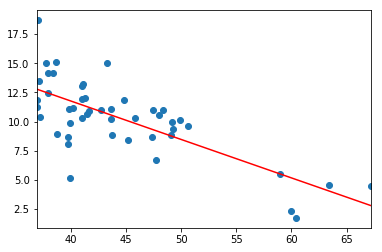

Enter city name (or "quit" to quit): Norway
City not in dataset
Enter city name (or "quit" to quit): France
City not in dataset
Enter city name (or "quit" to quit): Turkey
City not in dataset
Enter city name (or "quit" to quit): quit


In [10]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b)
        print('Actual temperature:', float(city.temperature))

### <font color="green">Your Turn: World Cup Data</font>

In [ ]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

In [ ]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
# Reminder: copy-paste-modify approach to programming!

In [ ]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes

In [ ]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal

In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string